In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
car_price = pd.read_csv("CarPrice.csv")

In [4]:
car_price

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
car_price.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
for col in car_price.columns:
    if car_price[col].dtype =='object':
        car_price[col].fillna(car_price[col].mode()[0],inplace=True)
    else:
        car_price[col].fillna(car_price[col].mean(),inplace=True)


/var/folders/vk/6dmk17957sd4lcsttqth20zm0000gn/T/ipykernel_40600/3233929820.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_price[col].fillna(car_price[col].mean(),inplace=True)
/var/folders/vk/6dmk17957sd4lcsttqth20zm0000gn/T/ipykernel_40600/3233929820.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

###  Converting categorical to numerical values using label encoder

In [7]:
label_encode = LabelEncoder()
for col in car_price.columns:
    if car_price[col].dtype=='object':
        car_price[col]=label_encode.fit_transform(car_price[col])

In [8]:
car_price

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [9]:
correlation_matrix = car_price.corr()
correlation_matrix

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.967077,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,...,-0.033930,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CarName,0.967077,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.014550,...,-0.153982,0.123845,0.188598,-0.181775,0.101730,-0.092131,-0.138309,0.093437,0.102895,-0.231439
fueltype,-0.125568,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,0.067729,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.190352,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,0.098303,-0.596135,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,0.051406,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.051483,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.129729,-0.531954,0.014550,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816


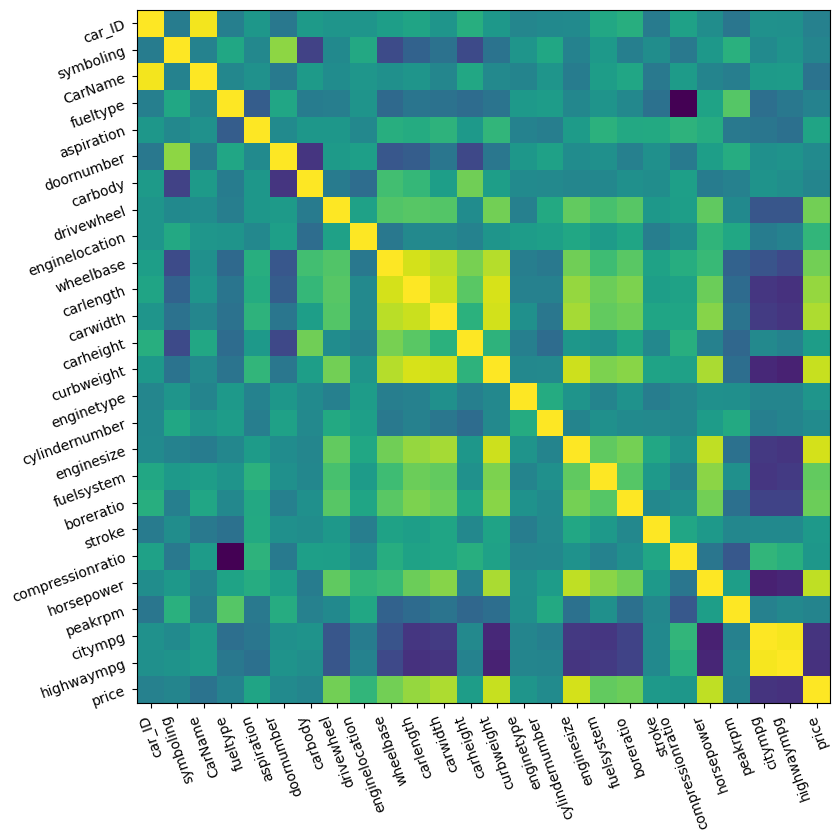

In [10]:
plt.figure(figsize=(9,9))
plt.imshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=110)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.index , rotation=20)
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
X = car_price[['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 
               'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 
               'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 
               'highwaympg']]
y = car_price['price']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
LR = LinearRegression()

In [13]:
LR.fit(X_train, y_train)

LinearRegression()

### in a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [14]:
LR.coef_

array([  763.46931585, -3965.65270316, 10945.40464436,  1120.07263303,
       -1498.97970299, -4571.93421726,  1680.26427485, 11523.69983761,
        6097.11447818, -3519.6610752 ,  6833.57294065,  2396.83727767,
        6892.98043283,  1696.32485015, -1526.33706551, 20998.15462253,
         923.93285921, -1181.78244041, -4091.96609295, 14899.20040434,
        4458.43445365,  3186.97643558, -5757.07835014,  3065.410638  ])

In [15]:
LR.intercept_

-8017.030720982621

In [16]:
y_pred = LR.predict(X_test)
y_pred

array([25653.10322076, 17598.74148462,  9669.27654344, 13535.57665124,
       26527.85617514,  6322.55589502,  8498.34641517,  5774.02823388,
        9519.7586162 ,  6903.1887775 , 13803.98729703,  5950.7499891 ,
       16679.67101398, 10432.80769795, 40132.97143166,  6600.22005442,
         -50.81104432, 14365.95782137,  9648.47563341, 10453.46229641,
       11102.56580569, 21056.21805417,  7948.16420041,  3235.15701746,
        7717.61022734, 24445.86380165, 14023.91307823, 15818.12775588,
        5249.28332054, 16195.39806549, 26548.75947711,  7090.56452652,
        4526.14782278, 22076.94891349,  8251.77885968, 26788.87986187,
       10066.02430772,  9770.22115645,  6831.1540548 , 14660.50118738,
        7435.45461509])

In [17]:
error= mean_squared_error(y_pred, y_test)
error

12575220.827585049

In [18]:
r2_score = r2_score(y_pred,y_test)
r2_score

0.8078215997977287

In [19]:
root_mse = np.sqrt(error)
root_mse

3546.1557816296013

In [22]:
y  = car_price[['price']]
x  = car_price.drop(['price' , 'car_ID'] , axis = 1)

In [23]:
x

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,2,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,3,3,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,1,1,0,1,2,2,0,94.5,171.2,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,4,1,0,0,3,1,0,99.8,176.6,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,2,5,1,0,0,3,0,0,99.4,176.6,...,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,0,0,3,2,0,109.1,188.8,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
201,-1,138,1,1,0,3,2,0,109.1,188.8,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
202,-1,140,1,0,0,3,2,0,109.1,188.8,...,3,173,5,3.58,2.87,8.8,134,5500,18,23
203,-1,142,0,1,0,3,2,0,109.1,188.8,...,3,145,3,3.01,3.40,23.0,106,4800,26,27
